# Classification : Alejandro Gonzalez

This is a home programming assignment on Sklearn programming for a classification problem. Download this [Bank Marketing](https://www.kaggle.com/datasets/tunguz/bank-marketing-data-set) dataset at Kaggle and use the data in `bank.csv` for faster iterations. Follow the ML process learned in class to build a model that will predict whether a customer subscribes or not.

Turn in your work by the deadline, not to lose 0.5 point on the Weekly Assignments grade. You are expected to spend at least 2 hours on this learning activity. Begin by changing FIRSTNAME and LASTNAME above with your own information.

In [ ]:
from google.colab import drive
drive.mount('/gdrive')
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
import yfinance as yf
import datetime
import os

Mounted at /gdrive


/usr/local/lib/python3.10/dist-packages/yfinance/base.py:48: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  _empty_series = pd.Series()


In [ ]:
mountpoint = os.path.join(os.path.abspath('.'), 'drive')
drive.mount(mountpoint, force_remount=True)
classroom = os.path.join(mountpoint, 'MyDrive/Classroom/UE10 Machine Learning for Finance using Python M2 Finance FIT & FiRE 2023-2024/Classification/')
os.listdir(classroom)

In [ ]:
banks=pd.read_csv(os.path.join(classroom,os.listdir(classroom)[0]), sep = ';')

# Database Checking and Understanding

In [ ]:
banks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [ ]:
banks.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


<Axes: >

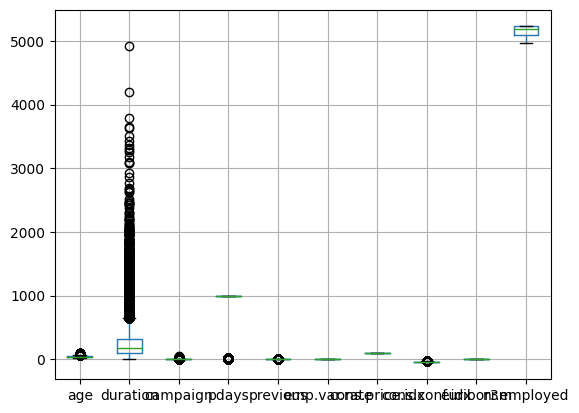

In [ ]:
banks.boxplot(column=['duration'])

<Axes: >

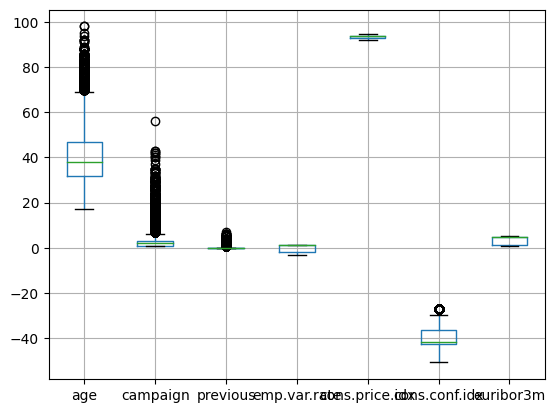

In [ ]:
banks.drop(['duration','nr.employed','pdays'], axis=1).boxplot()

In [ ]:
banks.isna().sum() #NA Check

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

# Preprocessing / Data base transformation of categorical variables into dummies

In [ ]:
df = pd.get_dummies(banks.drop('y', axis=1)) #Get dummies for categorical/string variables
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 63 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            41188 non-null  int64  
 1   duration                       41188 non-null  int64  
 2   campaign                       41188 non-null  int64  
 3   pdays                          41188 non-null  int64  
 4   previous                       41188 non-null  int64  
 5   emp.var.rate                   41188 non-null  float64
 6   cons.price.idx                 41188 non-null  float64
 7   cons.conf.idx                  41188 non-null  float64
 8   euribor3m                      41188 non-null  float64
 9   nr.employed                    41188 non-null  float64
 10  job_admin.                     41188 non-null  uint8  
 11  job_blue-collar                41188 non-null  uint8  
 12  job_entrepreneur               41188 non-null 

In [ ]:
target_col = 'y'
features = banks.drop(target_col, axis = 1)
target = banks[target_col]

scaler = StandardScaler()
X = scaler.fit_transform(df)

X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=0.2, random_state=12)

# Diferent Model Approaches

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
# Create and fit the model
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

print(knn.score(X_train, y_train))
print(knn.score(X_test, y_test))

Prediction for test example 0: no
0.9192109256449166
0.8976693372177713
1.0


In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,y_train)
print(lr.score(X_train, y_train))
print(lr.score(X_test, y_test))

0.9111684370257966
0.9126001456664239


In [ ]:
from sklearn.svm import SVC
svm = SVC(C = 1, gamma = 'auto')
svm.fit(X_train,y_train)
print(svm.score(X_train, y_train))
print(svm.score(X_test, y_test))

0.9292867981790591
0.9085943190094683


# Results Resume

In [ ]:
results_df = pd.DataFrame({'Actual': y_test, 'KNN Predictions': knn.predict(X_test),'LR Predictions': lr.predict(X_test), 'SVM Predictions': svm.predict(X_test)})

print(results_df.head(20))

      Actual KNN Predictions LR Predictions SVM Predictions
28800     no              no             no              no
31345     no              no             no              no
20075     no              no             no              no
2929      no              no             no              no
4776      no              no             no              no
30680     no              no             no              no
39065    yes              no            yes              no
1020      no              no             no              no
29343     no              no             no              no
39247     no              no            yes              no
17811     no              no             no              no
10991     no              no             no              no
31014     no              no             no              no
39988     no             yes             no              no
16245     no              no             no              no
17352     no              no            